In [4]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


A.3 Discretização de variáveis contínuas por meio de quantização com bins fixos

A discretização com bins fixos divide o intervalo dos dados contínuos em partes iguais e atribui os dados a esses intervalos. Esta técnica é útil quando desejamos simplificar os dados contínuos em categorias discretas.

### Exemplo e Código:

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dados contínuos de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50

# Discretização em 10 bins fixos
bins = np.linspace(np.min(dados), np.max(dados), 11)
dados_discretizados = np.digitize(dados, bins) 
df = pd.DataFrame(dados_discretizados)
df.head(50)

,0
0,9
1,6
2,7
3,10
4,9
5,4
6,7
7,5
8,6
9,6


        Notas
0   74.967142
1   68.617357
2   76.476885
3   85.230299
4   67.658466
5   67.658630
6   85.792128
7   77.674347
8   65.305256
9   75.425600
10  65.365823
11  65.342702
12  72.419623
13  50.867198
14  52.750822
15  64.377125
16  59.871689
17  73.142473
18  60.919759
19  55.876963
20  84.656488
21  67.742237
22  70.675282
23  55.752518
24  64.556173
Tabela de Frequência:
Notas
[43.803, 49.142)     1
[49.142, 54.482)     7
[54.482, 59.822)    23
[59.822, 65.162)    32
[65.162, 70.502)    39
[70.502, 75.842)    51
[75.842, 81.182)    27
[81.182, 86.522)    13
[86.522, 91.862)     4
[91.862, 97.255)     3
Name: count, dtype: int64


C:\Users\dacio.souza\AppData\Local\Temp\ipykernel_14344\850310932.py:16: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tabela_frequencia = pd.value_counts(pd.cut(dados['Notas'], bins=10, include_lowest=True, right=False), sort=False)


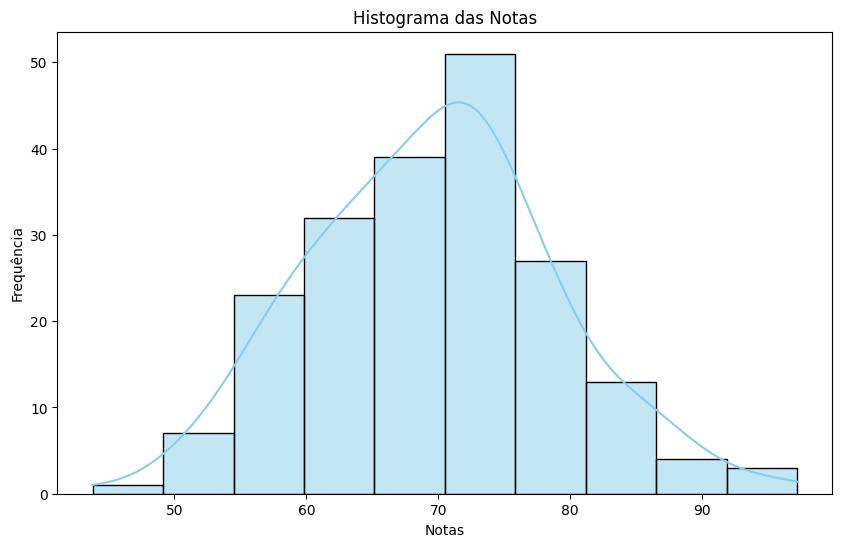

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar a semente para reprodutibilidade
np.random.seed(42)

# Gerar um conjunto de dados fictício com notas distribuídas normalmente
dados = pd.DataFrame({
    'Notas': np.random.normal(loc=70, scale=10, size=200)
})
print(dados.head(25))

# Criar a tabela de frequência simples
tabela_frequencia = pd.value_counts(pd.cut(dados['Notas'], bins=10, include_lowest=True, right=False), sort=False)

# Exibir a tabela de frequência simples
print("Tabela de Frequência:")
print(tabela_frequencia)

# Visualizar a distribuição de frequências com um histograma
plt.figure(figsize=(10, 6))
sns.histplot(dados['Notas'], bins=10, color='skyblue', kde=True)
plt.title('Histograma das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

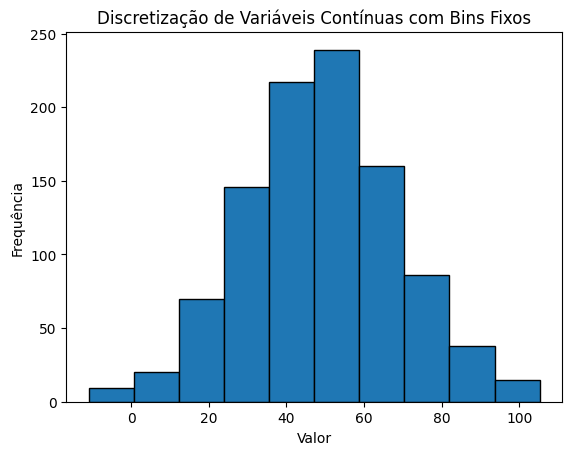

In [54]:

# Plotagem dos dados discretizados
plt.hist(dados, bins=bins, edgecolor='k')
# plt.scatter(dados, np.linspace(0,230,1000), color='red', edgecolors='k', alpha=0.7)
plt.title('Discretização de Variáveis Contínuas com Bins Fixos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

### Resultados Esperados:
O gráfico resultante mostrará um histograma dos dados contínuos, com os dados distribuídos em 10 bins fixos. 

A.4 Discretização de variáveis contínuas por meio de quantização com bins variáveis

A discretização com bins variáveis ajusta a largura dos bins para que cada bin tenha aproximadamente o mesmo número de amostras. Este método é útil para dados não uniformemente distribuídos.

### Exemplo e Código:

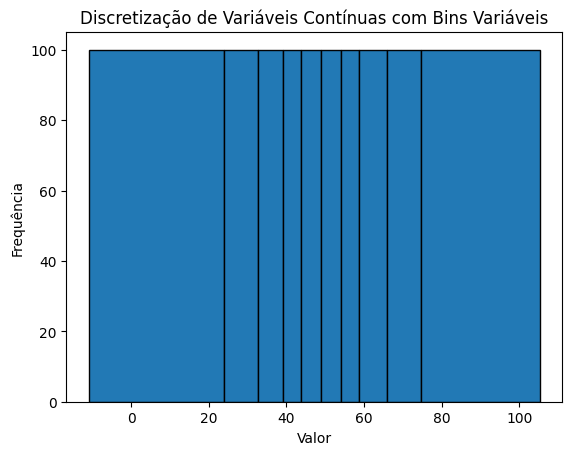

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dados contínuos de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50

# Discretização em 10 bins variáveis
dados_discretizados, bins = pd.qcut(dados, q=10, retbins=True, labels=False)

# Plotagem dos dados discretizados
plt.hist(dados, bins=bins, edgecolor='k', alpha=0.99)
# plt.scatter(dados, np.linspace(0,100,1000), color='red', edgecolors='k', alpha=0.5)
plt.title('Discretização de Variáveis Contínuas com Bins Variáveis')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

### Resultados Esperados:
O gráfico resultante mostrará um histograma com bins de larguras variáveis, cada um contendo aproximadamente o mesmo número de amostras.

A.5 Utilizar a FunctionTransformer do sklearn em uma variável

A `FunctionTransformer` permite aplicar transformações personalizadas aos dados. Um uso comum é a transformação logarítmica.

### Exemplo e Código:

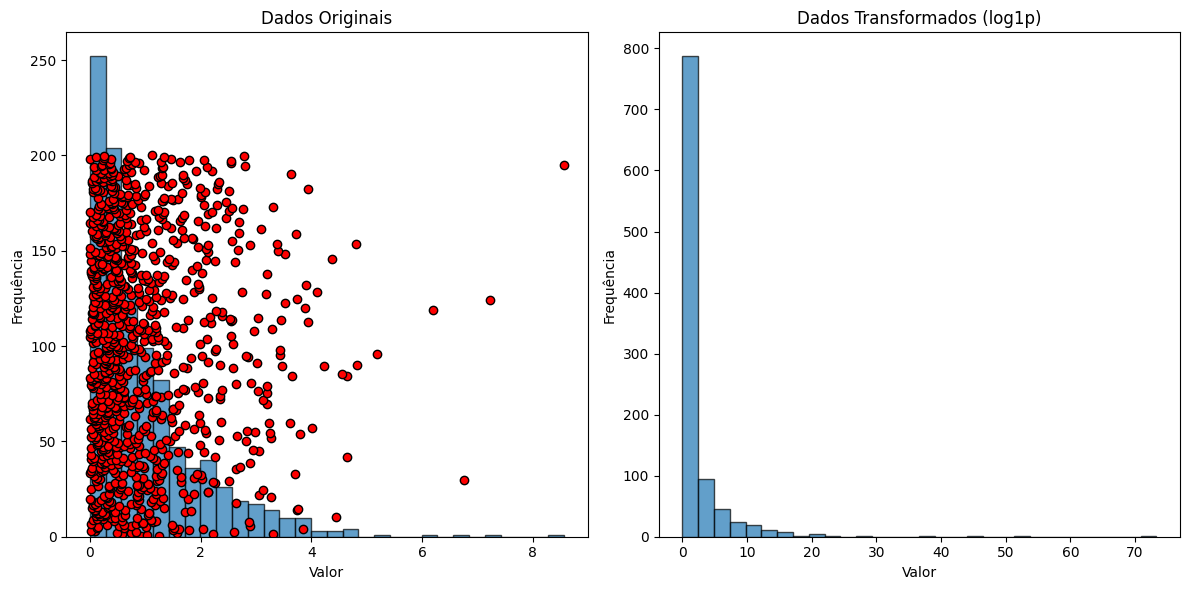

In [67]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.exponential(scale=1, size=1000)

# Função de transformação: logaritmo natural
transformer = FunctionTransformer(np.square, validate=True)
dados_transformados = transformer.transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e transformados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.scatter(dados ,np.linspace(0,200,1000), color='red', edgecolor='k')
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_transformados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Transformados (log1p)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados transformados pela função logarítmica, evidenciando a distribuição mais normal dos dados transformados.

A.6 Utilizar a PowerTransformer do sklearn em uma variável

A `PowerTransformer` aplica uma transformação de potência para estabilizar a variância e tornar os dados mais normais.

### Exemplo e Código:

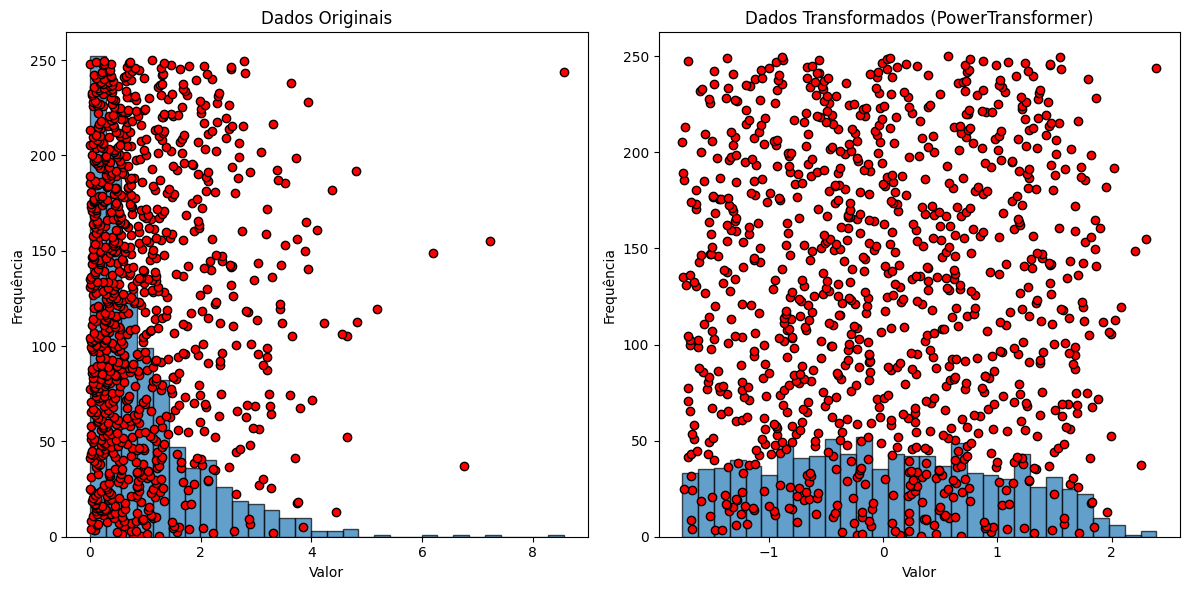

In [75]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.exponential(scale=1, size=1000)

# Aplicar PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
dados_transformados = pt.fit_transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e transformados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.scatter(dados,np.linspace(0,250,1000),color='red',edgecolor='k')
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_transformados, bins=30, edgecolor='k', alpha=0.7)
plt.scatter(dados_transformados,np.linspace(0,250,1000),color='red',edgecolor='k')
plt.title('Dados Transformados (PowerTransformer)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados transformados pelo `PowerTransformer`, mostrando uma distribuição mais normal dos dados transformados.

A.7 Utilizar a normalização Min-Max do sklearn para garantir que os dados estão na mesma faixa-dinâmica

A normalização Min-Max escala os dados para um intervalo específico, geralmente [0, 1].

### Exemplo e Código:

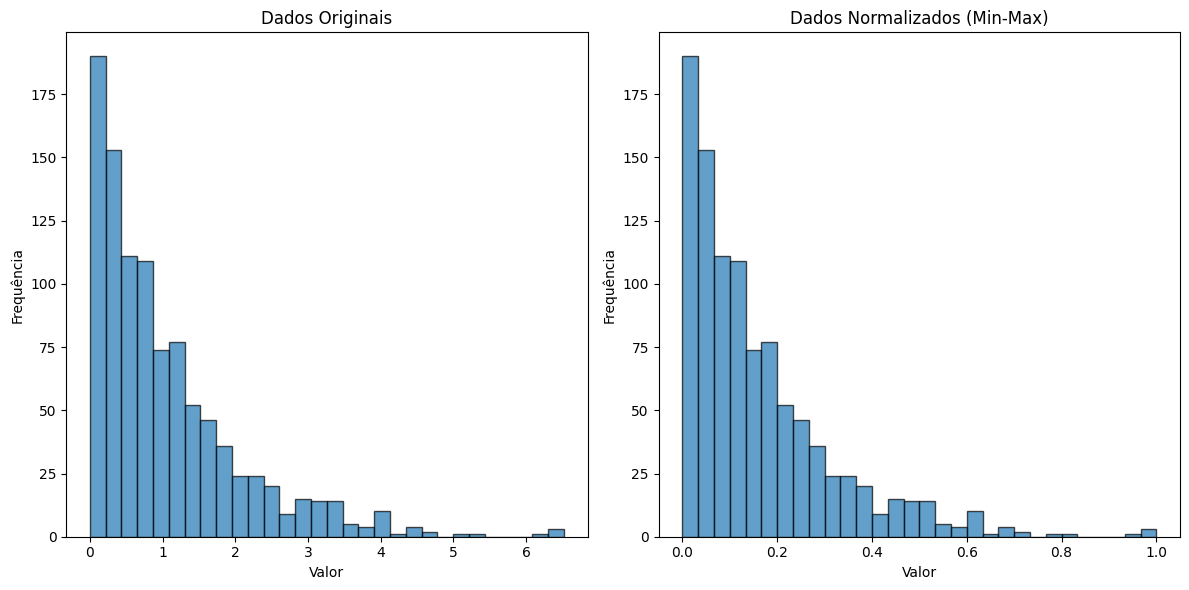

In [73]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50
dados = np.random.exponential(scale=1, size=1000)


# Aplicar MinMaxScaler
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e normalizados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_normalizados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Normalizados (Min-Max)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados normalizados no intervalo [0, 1].

A.8 Utilizar a normalização Standard Scaler

A normalização Standard Scaler padroniza os dados para que tenham média 0 e desvio padrão 1.

### Exemplo e Código:

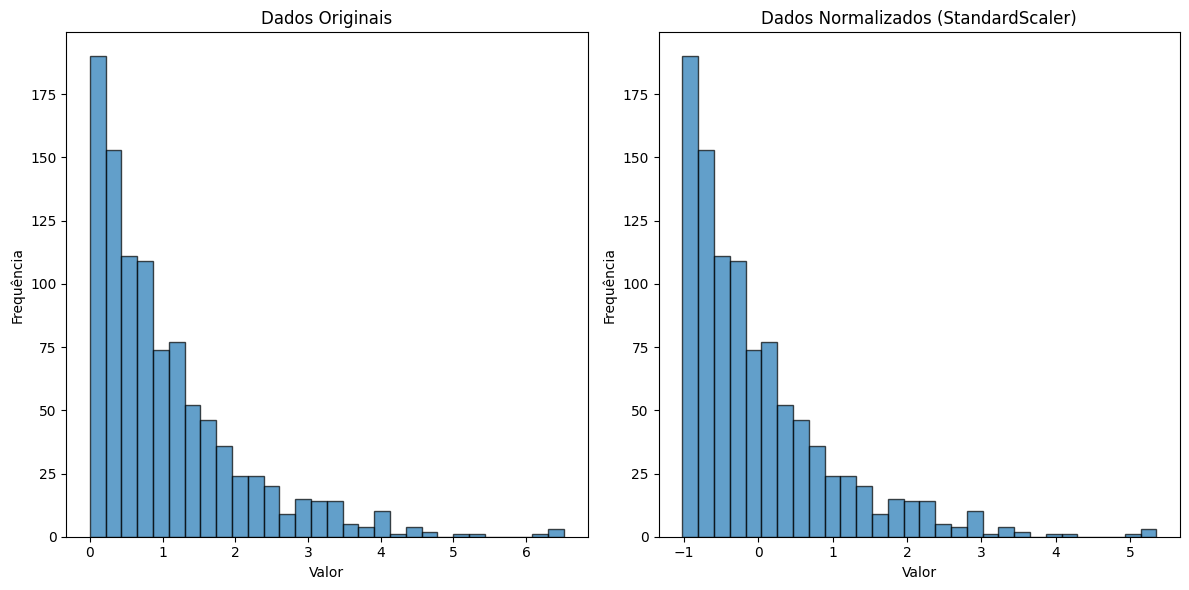

In [74]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50
dados = np.random.exponential(scale=1, size=1000)


# Aplicar StandardScaler
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e normalizados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_normalizados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Normalizados (StandardScaler)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados padronizados, centralizados em torno de 0.

A.9 Utilizar a regularização norma-l2

A regularização L2 adiciona uma penalidade ao quadrado dos coeficientes do modelo para evitar overfitting. Utilizando a `Ridge Regression` como exemplo:

### Exemplo e Código:

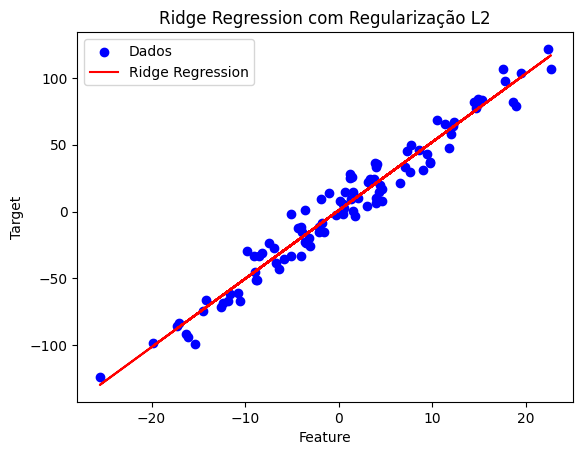

In [11]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
np.random.seed(0)
X = np.random.randn(100, 1) * 10
y = 5 * X.squeeze() + np.random.randn(100) * 10

# Aplicar Ridge Regression com regularização L2
model = Ridge(alpha=1.0)
model.fit(X, y)

# Plotagem dos dados e da linha de regressão
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, model.predict(X), color='red', label='Ridge Regression')
plt.title('Ridge Regression com Regularização L2')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

### Resultados Esperados:
O gráfico mostrará um scatter plot dos dados originais e a linha de regressão ajustada pelo modelo `Ridge`, ilustrando o efeito da regularização L2.

A.10 Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

1. **Filtragem**: Seleção de features baseada em métodos estatísticos. Exemplo com `SelectKBest`:

1. **Filtragem**: Seleção de features baseada em métodos estatísticos. Exemplo com `SelectKBest`:

### Exemplo e Código:

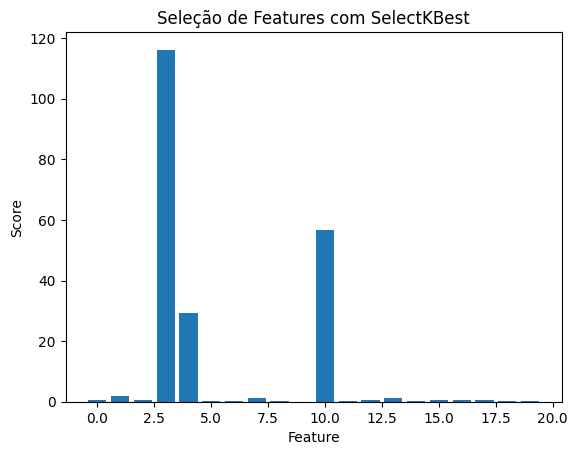

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)

# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Exibir as scores das features
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Seleção de Features com SelectKBest')
plt.show()

### Resultados Esperados:
O gráfico de barras mostrará as scores de cada feature, com as 5 melhores selecionadas para o modelo.

2. **Wrapper**: Seleção de features usando um modelo preditivo. Exemplo com `RFE`:

### Exemplo e Código:

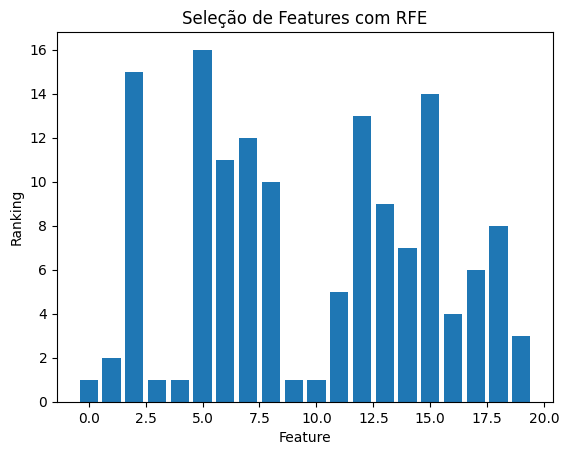

In [13]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)

# Aplicar RFE com Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)

# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

### Resultados Esperados:
O gráfico de barras mostrará o ranking das features, com as 5 melhores selecionadas para o modelo.

3. **Embedding**: Seleção de features integrada ao processo de treinamento. Exemplo com `Lasso`:

### Exemplo e Código:

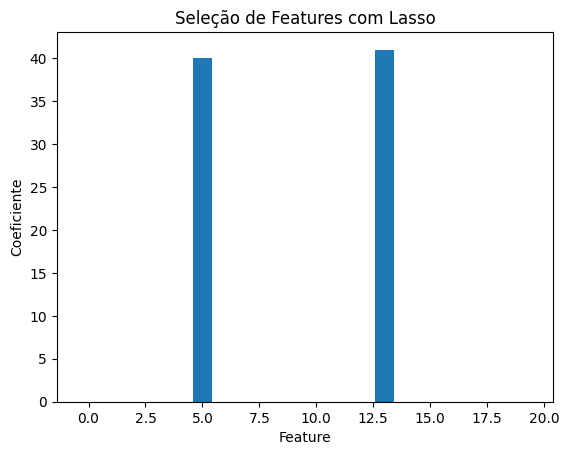

In [14]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
X, y = make_regression(n_samples=100, n_features=20, n_informative=2, noise=0.1, random_state=0)

# Aplicar Lasso para seleção de features
model = Lasso(alpha=0.1)
model.fit(X, y)

# Exibir coeficientes das features
coef = model.coef_
plt.bar(range(len(coef)), coef)
plt.xlabel('Feature')
plt.ylabel('Coeficiente')
plt.title('Seleção de Features com Lasso')
plt.show()

### Resultados Esperados:
O gráfico de barras mostrará os coeficientes das features, com coeficientes diferentes de zero indicando as features selecionadas pelo modelo `Lasso`.

### Conclusão

Um resumo das técnicas abordadas:

- **Discretização com bins fixos**: Transforma variáveis contínuas em categorias discretas de largura fixa.
- **Discretização com bins variáveis**: Transforma variáveis contínuas em categorias discretas com o mesmo número de amostras.
- **FunctionTransformer**: Permite aplicar transformações personalizadas aos dados.
- **PowerTransformer**: Transforma os dados para estabilizar a variância e torná-los mais normais.
- **Min-Max Scaler**: Normaliza os dados para um intervalo específico.
- **Standard Scaler**: Padroniza os dados para que tenham média 0 e desvio padrão 1.
- **Regularização L2 (Ridge Regression)**: Adiciona uma penalidade ao quadrado dos coeficientes do modelo para evitar overfitting.
- **Seleção de Features**: Técnicas de filtragem, wrapper e embedding para selecionar as features mais úteis para o modelo.

### Exemplificação de Normalização

A normalização é uma técnica usada para ajustar a escala das features em um conjunto de dados. Ela é particularmente importante em algoritmos de machine learning baseados em distância (como KNN e SVM) e algoritmos de gradiente (como redes neurais), pois assegura que todas as features contribuam de forma equilibrada para o resultado final.

#### Exemplificação de Min-Max Scaler e Standard Scaler

A.7 Utilizar a normalização Min-Max do sklearn para garantir que os dados estão na mesma faixa-dinâmica

A normalização Min-Max escala os dados para um intervalo específico, geralmente [0, 1]. 

### Exemplo e Código:

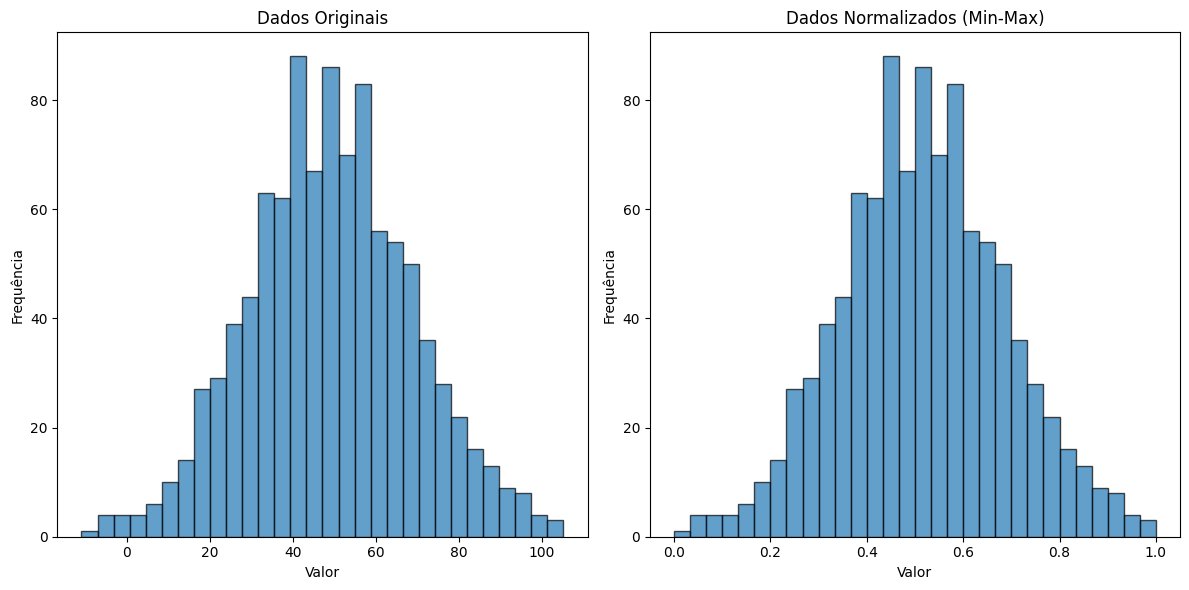

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50

# Aplicar MinMaxScaler
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e normalizados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_normalizados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Normalizados (Min-Max)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados normalizados no intervalo [0, 1].

A.8 Utilizar a normalização Standard Scaler

A normalização Standard Scaler padroniza os dados para que tenham média 0 e desvio padrão 1.

### Exemplo e Código:

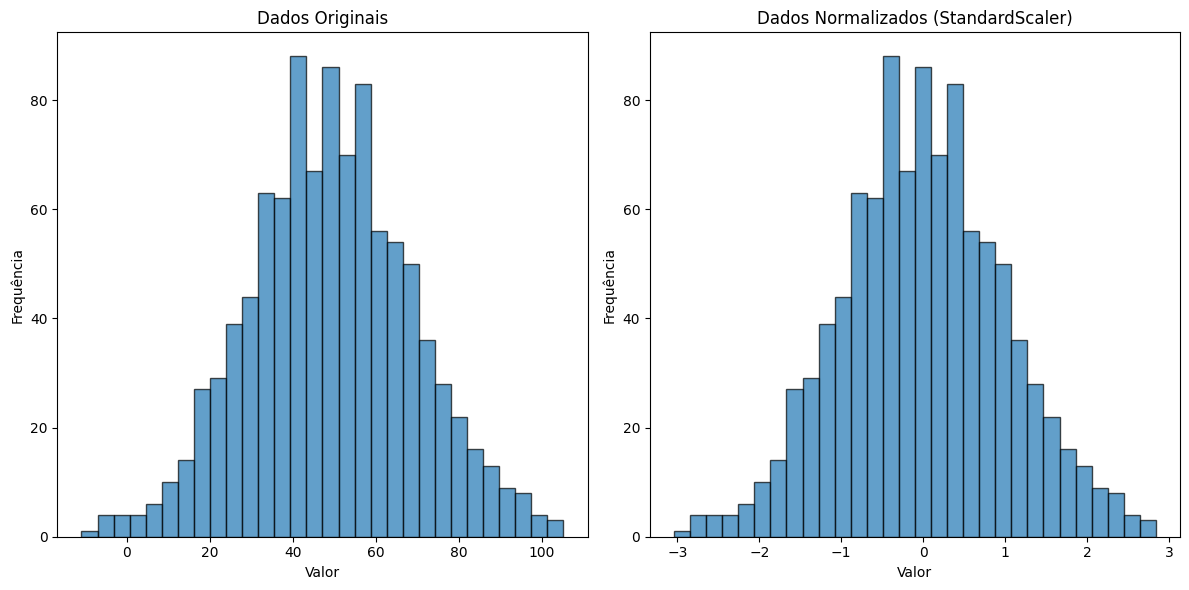

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50

# Aplicar StandardScaler
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e normalizados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_normalizados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Normalizados (StandardScaler)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados padronizados, centralizados em torno de 0.

### Comparação entre Min-Max Scaler e Standard Scaler

A principal diferença entre Min-Max Scaler e Standard Scaler é a forma como os dados são escalonados:

1. **Min-Max Scaler**:
   - Escala os dados para um intervalo definido, geralmente [0, 1].
   - É sensível a outliers, pois eles podem distorcer o intervalo.

2. **Standard Scaler**:
   - Padroniza os dados para que tenham média 0 e desvio padrão 1.
   - Não é tão sensível a outliers como Min-Max Scaler, mas outliers ainda podem influenciar a média e o desvio padrão.

### Aplicação em um Conjunto de Dados Real

Vamos aplicar essas técnicas de normalização a um conjunto de dados real, como o dataset `Iris` da biblioteca `sklearn`.

### Exemplo e Código:

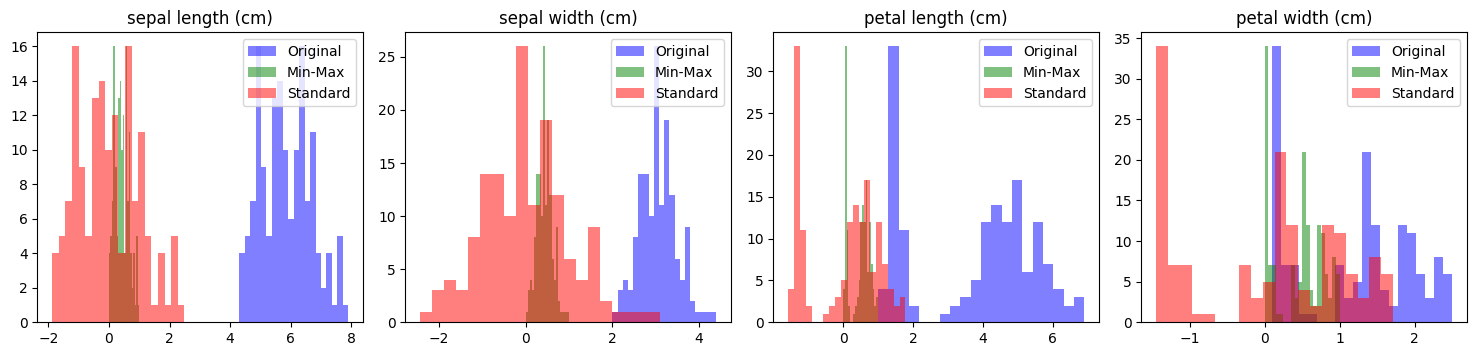

In [17]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
dados = iris.data
feature_names = iris.feature_names

# Aplicar MinMaxScaler
scaler_minmax = MinMaxScaler()
dados_minmax = scaler_minmax.fit_transform(dados)

# Aplicar StandardScaler
scaler_standard = StandardScaler()
dados_standard = scaler_standard.fit_transform(dados)

# Criar DataFrames para visualização
df_original = pd.DataFrame(dados, columns=feature_names)
df_minmax = pd.DataFrame(dados_minmax, columns=feature_names)
df_standard = pd.DataFrame(dados_standard, columns=feature_names)

# Plotagem dos dados normalizados
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_names):
    plt.subplot(3, 4, i + 1)
    plt.hist(df_original[feature], bins=20, alpha=0.5, label='Original', color='blue')
    plt.hist(df_minmax[feature], bins=20, alpha=0.5, label='Min-Max', color='green')
    plt.hist(df_standard[feature], bins=20, alpha=0.5, label='Standard', color='red')
    plt.title(feature)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará histogramas das quatro features do dataset Iris (sepal length, sepal width, petal length, petal width) para as três versões dos dados: originais, normalizados com Min-Max Scaler e normalizados com Standard Scaler. Isso ilustrará como cada técnica de normalização afeta a distribuição dos dados.


### Exemplificação de Regularização L2

A regularização L2 é uma técnica utilizada para evitar overfitting em modelos de machine learning, especialmente em modelos lineares. A regularização L2 adiciona uma penalidade ao quadrado dos coeficientes do modelo, o que ajuda a manter os coeficientes pequenos e, portanto, o modelo mais simples e generalizável.

#### Utilizando a Regularização L2 com Ridge Regression

A regressão Ridge é uma forma de regressão linear que inclui uma penalidade de regularização L2. A seguir, um exemplo utilizando o conjunto de dados `diabetes` da biblioteca `sklearn`.

### Exemplo e Código:

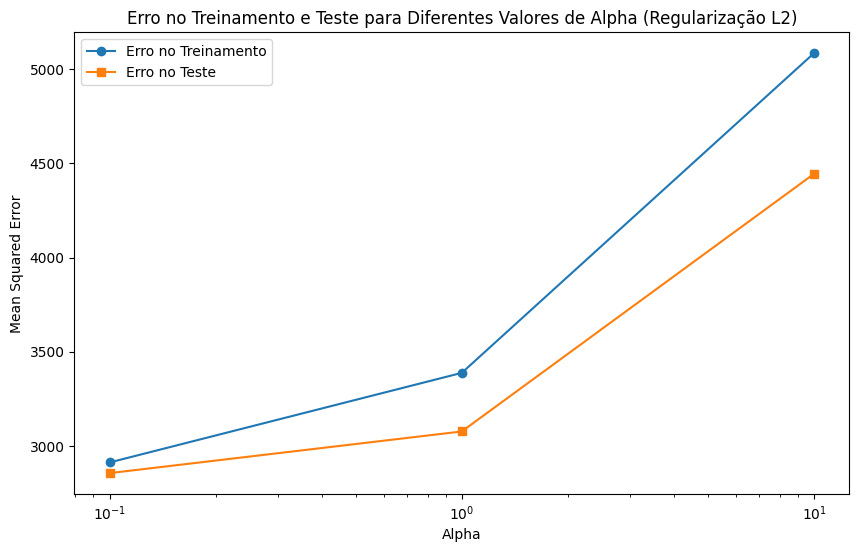

In [18]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar o dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Ridge Regression com regularização L2
alpha_values = [0.1, 1.0, 10.0]
mse_train = []
mse_test = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Plotar MSE para diferentes valores de alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_train, label='Erro no Treinamento', marker='o')
plt.plot(alpha_values, mse_test, label='Erro no Teste', marker='s')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Erro no Treinamento e Teste para Diferentes Valores de Alpha (Regularização L2)')
plt.legend()
plt.show()

### Resultados Esperados:
O gráfico mostrará o erro quadrático médio (MSE) no conjunto de treinamento e teste para diferentes valores de alpha (parâmetro de regularização). Isso ilustrará como a regularização L2 afeta o desempenho do modelo.

### Explicação Detalhada dos Componentes

1. **Carregar o Dataset**:

In [19]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

Carregamos o conjunto de dados `diabetes` da biblioteca `sklearn`. Esse conjunto de dados contém 442 amostras de pacientes com diabetes, com 10 características (features) para cada amostra.

2. **Dividir o Dataset em Treino e Teste**:

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dividimos o conjunto de dados em conjuntos de treinamento e teste com 80% dos dados para treinamento e 20% para teste.

3. **Aplicar Ridge Regression com Regularização L2**:

In [21]:
from sklearn.linear_model import Ridge
alpha_values = [0.1, 1.0, 10.0]
mse_train = []
mse_test = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

Testamos diferentes valores de alpha (0.1, 1.0, 10.0) para a penalização L2. Calculamos o erro quadrático médio (MSE) para os conjuntos de treinamento e teste.

4. **Plotar os Resultados**:

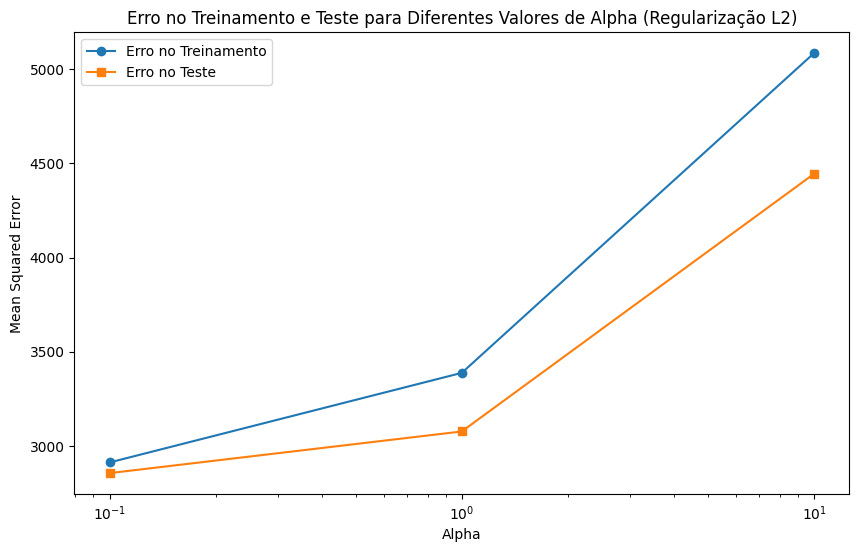

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_train, label='Erro no Treinamento', marker='o')
plt.plot(alpha_values, mse_test, label='Erro no Teste', marker='s')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Erro no Treinamento e Teste para Diferentes Valores de Alpha (Regularização L2)')
plt.legend()
plt.show()

Plotamos os erros quadráticos médios (MSE) para os diferentes valores de alpha no conjunto de treinamento e teste, utilizando uma escala logarítmica no eixo x para melhor visualização dos valores de alpha.

### Conclusão

A regularização L2 ajuda a controlar a complexidade do modelo, penalizando grandes coeficientes. Isso pode resultar em melhor generalização e redução de overfitting. Os valores de alpha controlam a força da penalização, e a escolha do valor adequado pode ser feita por validação cruzada.


### Seleção de Features

A seleção de features é o processo de escolher um subconjunto das características (features) originais de um conjunto de dados que são mais relevantes para o modelo preditivo. Isso pode melhorar a eficiência do modelo, reduzir o overfitting e aumentar a interpretabilidade. Existem três principais métodos de seleção de features: Filtragem, Wrapper e Embedding.

#### 1. Filtragem

A filtragem seleciona features baseando-se em métodos estatísticos, independentemente do modelo preditivo.

##### Exemplo com `SelectKBest` e `f_classif`:

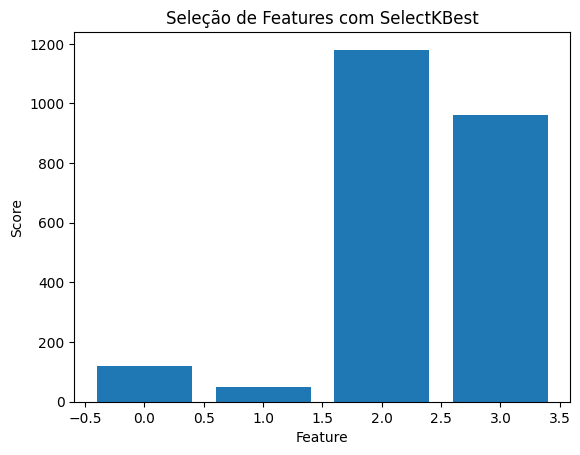

Features selecionadas: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [23]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Selecionar as 2 melhores features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Exibir as scores das features
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Seleção de Features com SelectKBest')
plt.show()

# Exibir as features selecionadas
print("Features selecionadas:", X_new[:5])

### Resultados Esperados:
O gráfico de barras mostrará as scores de cada feature, com as 2 melhores selecionadas. As features selecionadas serão exibidas no console.

#### 2. Wrapper

Os métodos de Wrapper utilizam um modelo preditivo para avaliar a combinação de features e selecionam aquelas que melhoram o desempenho do modelo.

##### Exemplo com `RFE` e `LogisticRegression`:

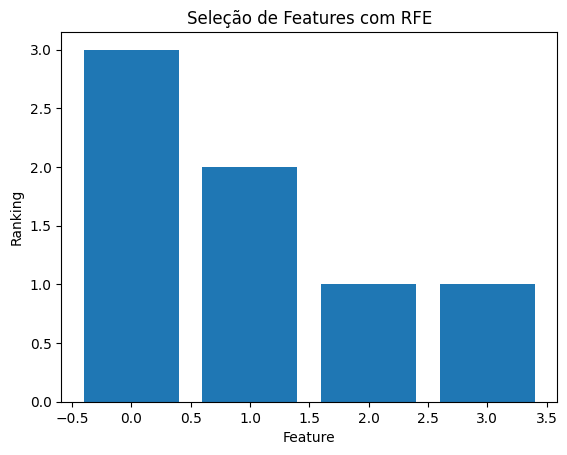

Features selecionadas: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar RFE com Logistic Regression para selecionar as 2 melhores features
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)

# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

# Exibir as features selecionadas
print("Features selecionadas:", X_new[:5])

### Resultados Esperados:
O gráfico de barras mostrará o ranking das features, com as 2 melhores selecionadas. As features selecionadas serão exibidas no console.

#### 3. Embedding

Os métodos de Embedding integram a seleção de features ao processo de treinamento do modelo. A regularização L1 é comumente usada para isso.

##### Exemplo com `Lasso`:

In [26]:
# import numpy as np
# from sklearn.datasets import load_boston
# from sklearn.linear_model import Lasso
# import matplotlib.pyplot as plt

# # Carregar o dataset Boston
# boston = load_boston()
# X = boston.data
# y = boston.target

# # Aplicar Lasso para seleção de features
# model = Lasso(alpha=0.1)
# model.fit(X, y)

# # Exibir coeficientes das features
# coef = model.coef_
# plt.bar(range(len(coef)), coef)
# plt.xlabel('Feature')
# plt.ylabel('Coeficiente')
# plt.title('Seleção de Features com Lasso')
# plt.show()

# # Exibir as features selecionadas (aquelas com coeficientes diferentes de zero)
# selected_features = np.where(coef != 0)[0]
# print("Features selecionadas:", selected_features)

### Resultados Esperados:
O gráfico de barras mostrará os coeficientes das features, com coeficientes diferentes de zero indicando as features selecionadas pelo modelo `Lasso`. As features selecionadas serão exibidas no console.

### Comparação dos Métodos

- **Filtragem**:
  - Vantagens: Simples e rápido.
  - Desvantagens: Não leva em conta a interação entre as features.

- **Wrapper**:
  - Vantagens: Considera a interação entre as features.
  - Desvantagens: Computacionalmente intensivo, especialmente em conjuntos de dados grandes.

- **Embedding**:
  - Vantagens: Seleção de features integrada ao processo de treinamento.
  - Desvantagens: Depende do modelo preditivo escolhido.

### Aplicação Prática

Esses métodos podem ser aplicados em qualquer conjunto de dados para melhorar o desempenho e a interpretabilidade do modelo. A escolha do método depende da natureza do conjunto de dados e do problema específico que está sendo resolvido.


### Detalhamento sobre PowerTransformer

O PowerTransformer aplica uma transformação de potência para estabilizar a variância e tornar os dados mais próximos de uma distribuição normal. Isso pode ser útil para melhorar o desempenho de algoritmos de machine learning que assumem que os dados seguem uma distribuição normal, como a regressão linear e SVM.

#### Exemplos com PowerTransformer

##### Exemplo e Código:

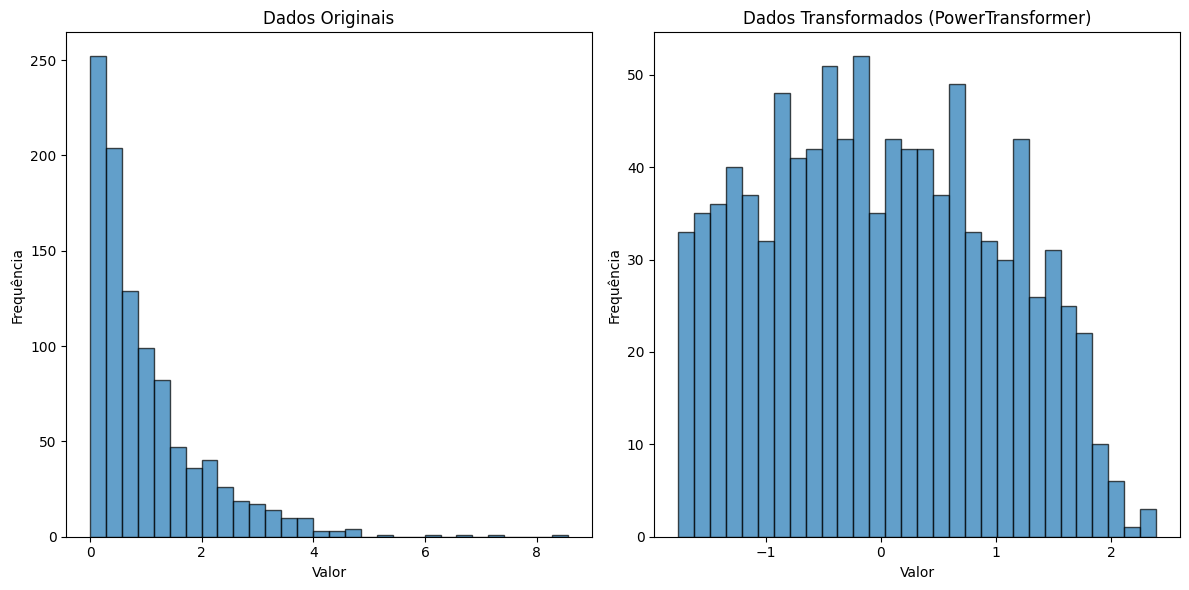

In [27]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.exponential(scale=1, size=1000)

# Aplicar PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
dados_transformados = pt.fit_transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e transformados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_transformados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Transformados (PowerTransformer)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados transformados pelo PowerTransformer, mostrando uma distribuição mais normal dos dados transformados.

### Explicação Detalhada

1. **Dados de Exemplo**:

In [29]:
np.random.seed(0)
dados = np.random.exponential(scale=1, size=1000)

Geramos dados de uma distribuição exponencial para ilustrar a transformação.

2. **Aplicar PowerTransformer**:

In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
dados_transformados = pt.fit_transform(dados.reshape(-1, 1))

Utilizamos o método `yeo-johnson`, que é apropriado para dados que podem conter valores negativos. O método `box-cox` poderia ser usado se todos os valores fossem positivos.

3. **Plotagem dos Dados**:

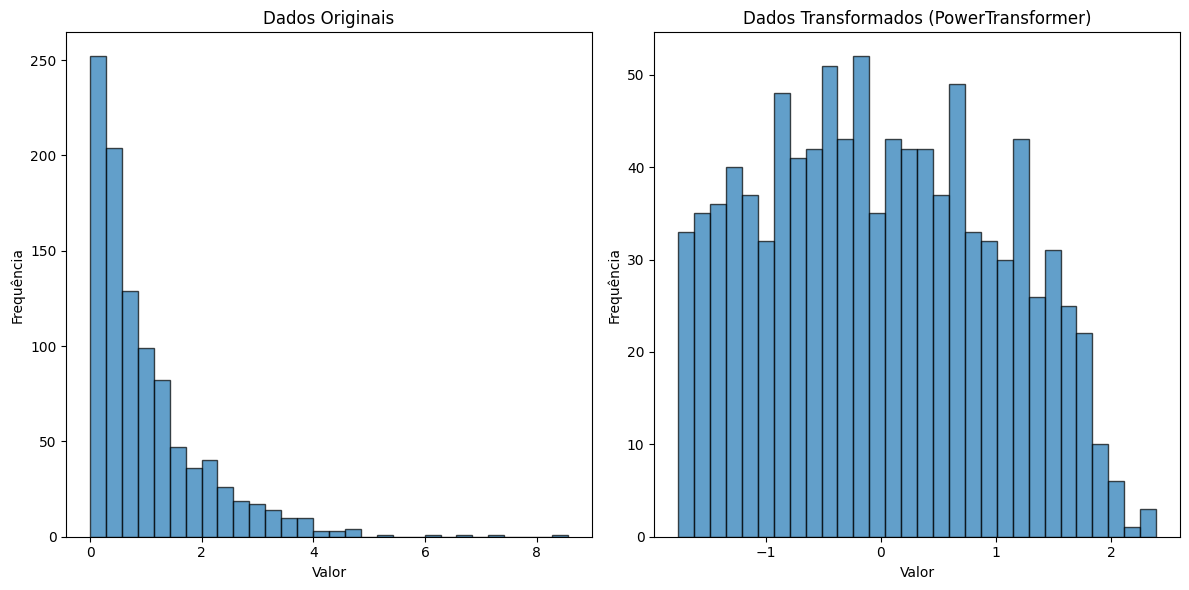

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_transformados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Transformados (PowerTransformer)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Os histogramas mostram a diferença entre a distribuição original e a distribuição transformada.

### Detalhamento sobre FunctionTransformer

O FunctionTransformer permite aplicar uma transformação arbitrária aos dados, utilizando uma função definida pelo usuário. Isso é útil quando você precisa de uma transformação específica que não está disponível nos transformadores padrão do `sklearn`.

#### Exemplos com FunctionTransformer

##### Exemplo e Código:

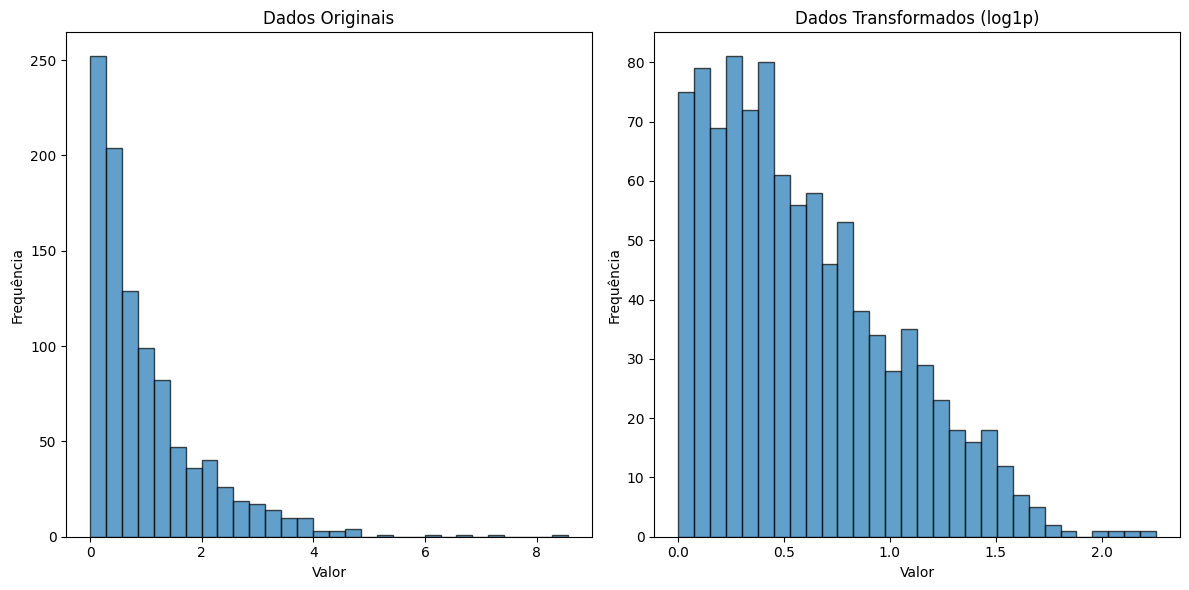

In [32]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt

# Dados de exemplo
np.random.seed(0)
dados = np.random.exponential(scale=1, size=1000)

# Função de transformação: logaritmo natural
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados.reshape(-1, 1))

# Plotagem dos dados originais e transformados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_transformados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Transformados (log1p)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Resultados Esperados:
O gráfico mostrará dois histogramas, um com os dados originais e outro com os dados transformados pela função logarítmica, evidenciando a distribuição mais normal dos dados transformados.

### Explicação Detalhada

1. **Dados de Exemplo**:

In [34]:
np.random.seed(0)
dados = np.random.exponential(scale=1, size=1000)

Geramos dados de uma distribuição exponencial para ilustrar a transformação.

2. **Aplicar FunctionTransformer**:

In [35]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados.reshape(-1, 1))

Utilizamos a função `np.log1p`, que calcula o logaritmo natural de (1 + x). Isso é útil para dados que podem conter zeros.

3. **Plotagem dos Dados**:

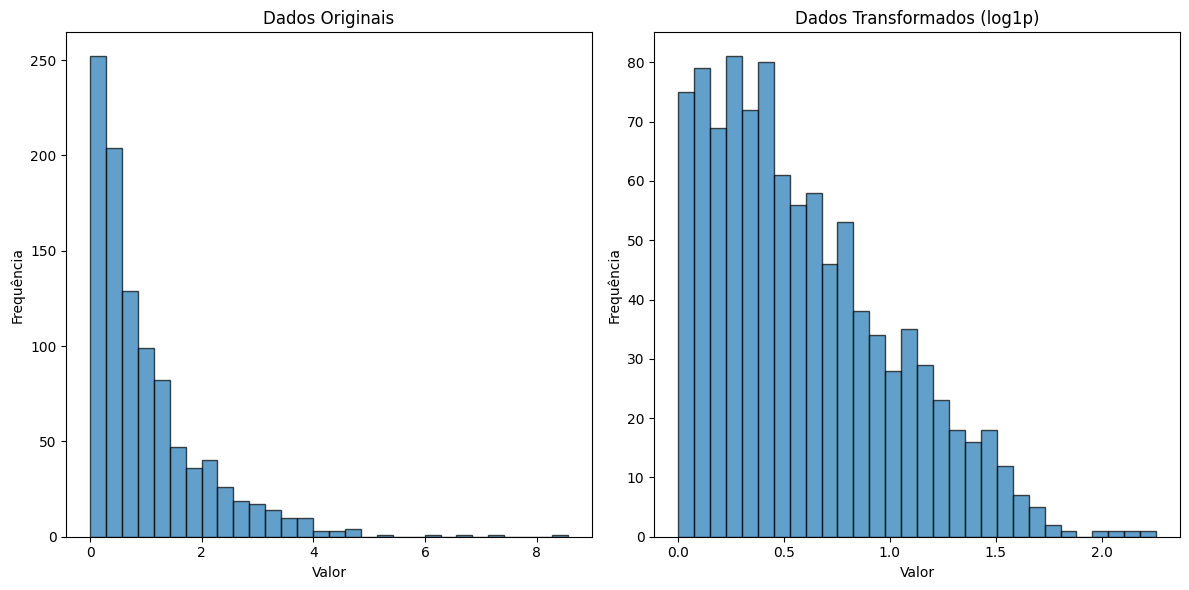

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(dados_transformados, bins=30, edgecolor='k', alpha=0.7)
plt.title('Dados Transformados (log1p)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Os histogramas mostram a diferença entre a distribuição original e a distribuição transformada pela função logarítmica.

### Aplicação Prática

Essas técnicas são úteis para transformar os dados de modo a melhorar a performance dos modelos de machine learning. A escolha da técnica de transformação depende da natureza dos dados e do problema específico a ser resolvido.

### Detalhamento sobre Discretização

A discretização de variáveis contínuas é o processo de transformar variáveis contínuas em variáveis categóricas ou discretas. Isso pode ser feito de várias maneiras, incluindo a quantização com bins fixos e variáveis.

#### 1. Discretização com Bins Fixos

##### Exemplo e Código:

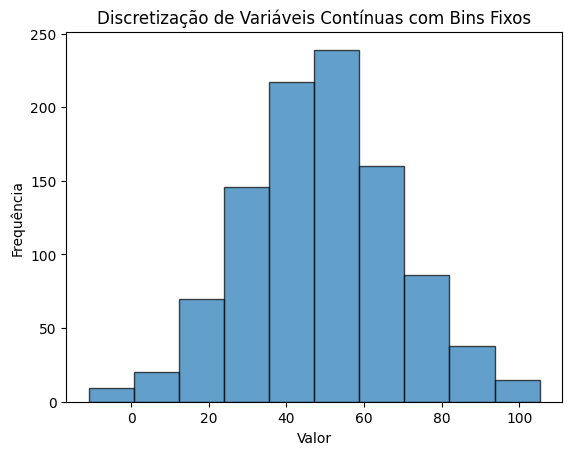

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dados contínuos de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50

# Discretização em 10 bins fixos
bins = np.linspace(np.min(dados), np.max(dados), 11)
dados_discretizados = np.digitize(dados, bins)

# Plotagem dos dados discretizados
plt.hist(dados, bins=bins, edgecolor='k', alpha=0.7)
plt.title('Discretização de Variáveis Contínuas com Bins Fixos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

### Resultados Esperados:
O gráfico resultante mostrará um histograma dos dados contínuos, com os dados distribuídos em 10 bins fixos.

#### 2. Discretização com Bins Variáveis

##### Exemplo e Código:

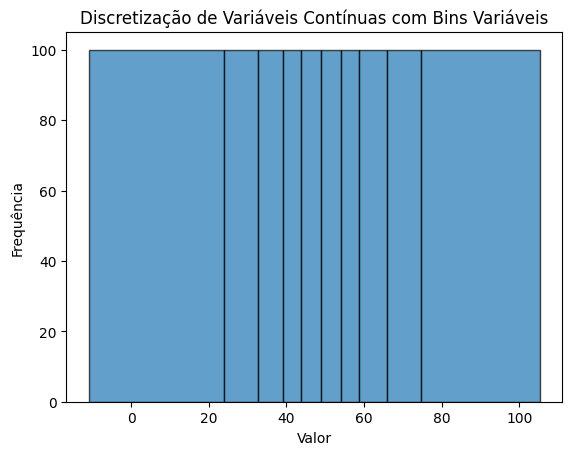

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dados contínuos de exemplo
np.random.seed(0)
dados = np.random.randn(1000) * 20 + 50

# Discretização em 10 bins variáveis
dados_discretizados, bins = pd.qcut(dados, q=10, retbins=True, labels=False)

# Plotagem dos dados discretizados
plt.hist(dados, bins=bins, edgecolor='k', alpha=0.7)
plt.title('Discretização de Variáveis Contínuas com Bins Variáveis')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

### Resultados Esperados:
O gráfico resultante mostrará um histograma com bins de larguras variáveis, cada um contendo aproximadamente o mesmo número de amostras.

### Aplicação Prática

Essas técnicas podem ser aplicadas para simplificar dados contínuos em problemas onde categorias discretas são mais apropriadas.

---

### Detalhamento sobre Regularização L2

A regularização L2 é uma técnica utilizada para evitar overfitting em modelos de machine learning, especialmente em modelos lineares. A regularização L2 adiciona uma penalidade ao quadrado dos coeficientes do modelo, o que ajuda a manter os coeficientes pequenos e, portanto, o modelo mais simples e generalizável.

#### Utilizando a Regularização L2 com Ridge Regression

##### Exemplo e Código:

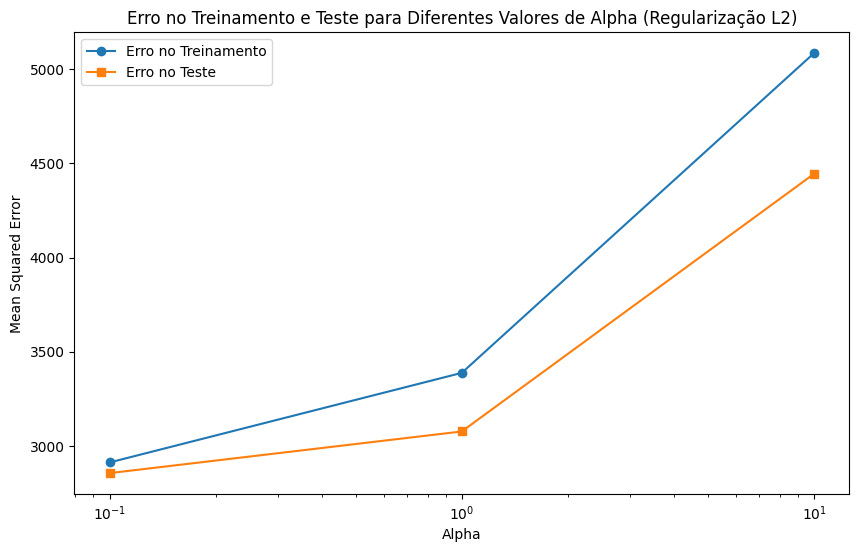

In [39]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar o dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Ridge Regression com regularização L2
alpha_values = [0.1, 1.0, 10.0]
mse_train = []
mse_test = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Plotar MSE para diferentes valores de alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_train, label='Erro no Treinamento', marker='o')
plt.plot(alpha_values, mse_test, label='Erro no Teste', marker='s')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Erro no Treinamento e Teste para Diferentes Valores de Alpha (Regularização L2)')
plt.legend()
plt.show()

### Resultados Esperados:
O gráfico mostrará o erro quadrático médio (MSE) no conjunto de treinamento e teste para diferentes valores de alpha (parâmetro de regularização). Isso ilustrará como a regularização L2 afeta o desempenho do modelo.

### Aplicação Prática

A regularização L2 ajuda a controlar a complexidade do modelo, penalizando grandes coeficientes. Isso pode resultar em melhor generalização e redução de overfitting. Os valores de alpha controlam a força da penalização, e a escolha do valor adequado pode ser feita por validação cruzada.

---

### Detalhamento sobre Seleção de Features

A seleção de features é o processo de escolher um subconjunto das características (features) originais de um conjunto de dados que são mais relevantes para o modelo preditivo. Isso pode melhorar a eficiência do modelo, reduzir o overfitting e aumentar a interpretabilidade. Existem três principais métodos de seleção de features: Filtragem, Wrapper e Embedding.

#### 1. Filtragem

A filtragem seleciona features baseando-se em métodos estatísticos, independentemente do modelo preditivo.

##### Exemplo com `SelectKBest` e `f_classif`:

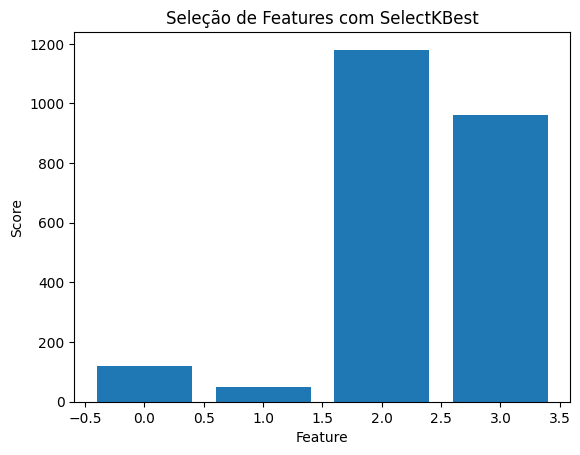

Features selecionadas: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Selecionar as 2 melhores features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Exibir as scores das features
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Seleção de Features com SelectKBest')
plt.show()

# Exibir as features selecionadas
print("Features selecionadas:", X_new[:5])

### Resultados Esperados:
O gráfico de barras mostrará as scores de cada feature, com as 2 melhores selecionadas. As features selecionadas serão exibidas no console.

#### 2. Wrapper

Os métodos de Wrapper utilizam um modelo preditivo para avaliar a combinação de features e selecionam aquelas que melhoram o desempenho do modelo.

##### Exemplo com `RFE` e `LogisticRegression`:

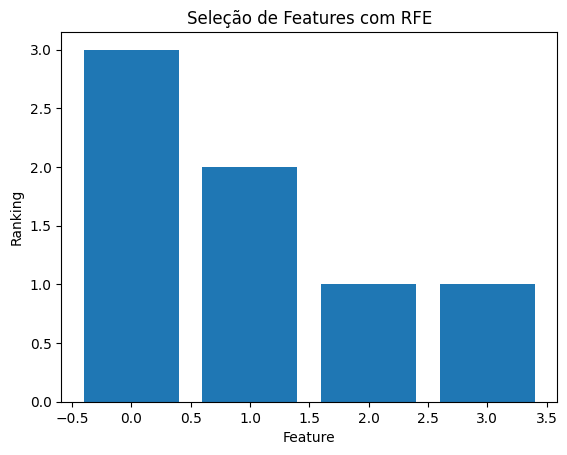

Features selecionadas: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [41]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar RFE com Logistic Regression para selecionar as 2 melhores features
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)

# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

# Exibir as features selecionadas
print("Features selecionadas:", X_new[:5])

### Resultados Esperados:
O gráfico de barras mostrará o ranking das features, com as 2 melhores selecionadas. As features selecionadas serão exibidas no console.

#### 3. Embedding

Os métodos de Embedding integram a seleção de features ao processo de treinamento do modelo. A regularização L1 é comumente usada para isso.

##### Exemplo com `Lasso`:

In [43]:
# import numpy as np
# from sklearn.datasets import load_boston
# from sklearn.linear_model import Lasso
# import matplotlib.pyplot as plt

# # Carregar o dataset Boston
# boston = load_boston()
# X = boston.data
# y = boston.target

# # Aplicar Lasso para seleção de features
# model = Lasso(alpha=0.1)
# model.fit(X, y)

# # Exibir coeficientes das features
# coef = model.coef_
# plt.bar(range(len(coef)), coef)
# plt.xlabel('Feature')
# plt.ylabel('Coeficiente')
# plt.title('Seleção de Features com Lasso')
# plt.show()

# # Exibir as features selecionadas (aquelas com coeficientes diferentes de zero)
# selected_features = np.where(coef != 0)[0]
# print("Features selecionadas:", selected_features)

### Resultados Esperados:
O gráfico de barras mostrará os coeficientes das features, com coeficientes diferentes de zero indicando as features selecionadas pelo modelo `Lasso`. As features selecionadas serão exibidas no console.

### Comparação dos Métodos

- **Filtragem**:
  - Vantagens: Simples e rápido.
  - Desvantagens: Não leva em conta a interação entre as features.

- **Wrapper**:
  - Vantagens: Considera a interação entre as features.
  - Desvantagens: Computacionalmente intensivo, especialmente em conjuntos de dados grandes.

- **Embedding**:
  - Vantagens: Seleção de features integrada ao processo de treinamento.
  - Desvantagens: Depende do modelo preditivo escolhido.

### Aplicação Prática

Esses métodos podem ser aplicados em qualquer conjunto de dados para melhorar o desempenho e a interpretabilidade do modelo. A escolha do método depende da natureza do conjunto de dados e do problema específico que está sendo resolvido.

#### Aplicação em um Conjunto de Dados Real

Vamos aplicar essas técnicas de discretização, regularização L2 e seleção de features ao conjunto de dados `Iris` e `Diabetes` da biblioteca `sklearn`.

### 1. Discretização no Conjunto de Dados Iris

#### Exemplo e Código:

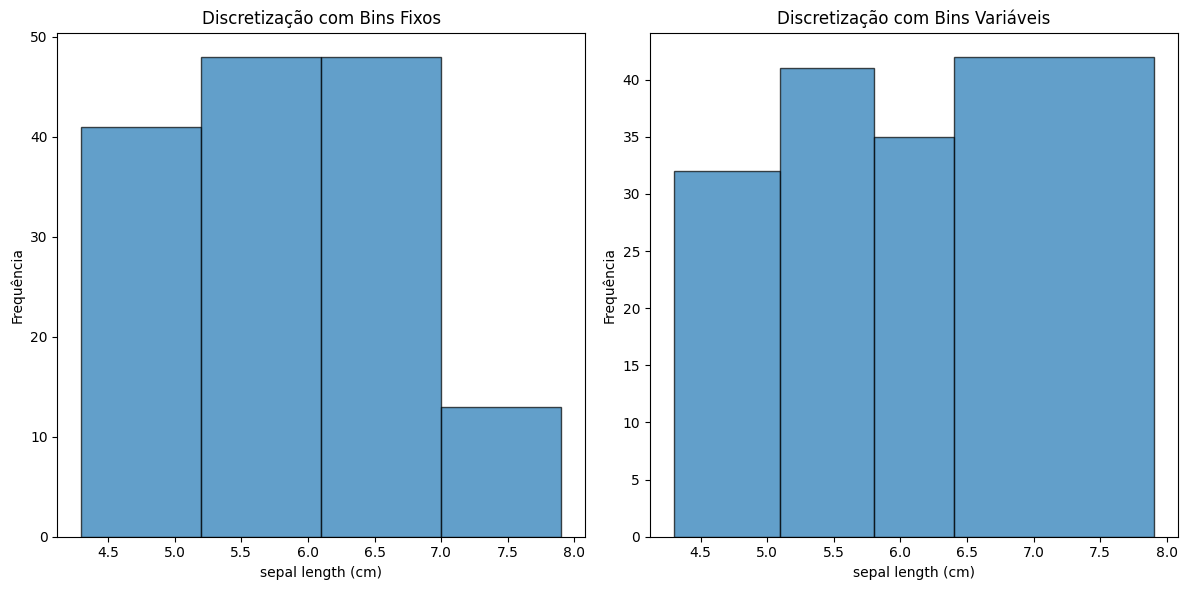

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Discretização com Bins Fixos
bins_fixed = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 5)
X_discretized_fixed = np.digitize(X[:, 0], bins_fixed)

# Discretização com Bins Variáveis
X_discretized_variable, bins_variable = pd.qcut(X[:, 0], q=4, retbins=True, labels=False)

# Plotagem dos dados discretizados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X[:, 0], bins=bins_fixed, edgecolor='k', alpha=0.7)
plt.title('Discretização com Bins Fixos')
plt.xlabel(feature_names[0])
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(X[:, 0], bins=bins_variable, edgecolor='k', alpha=0.7)
plt.title('Discretização com Bins Variáveis')
plt.xlabel(feature_names[0])
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### 2. Regularização L2 no Conjunto de Dados Diabetes

#### Exemplo e Código:

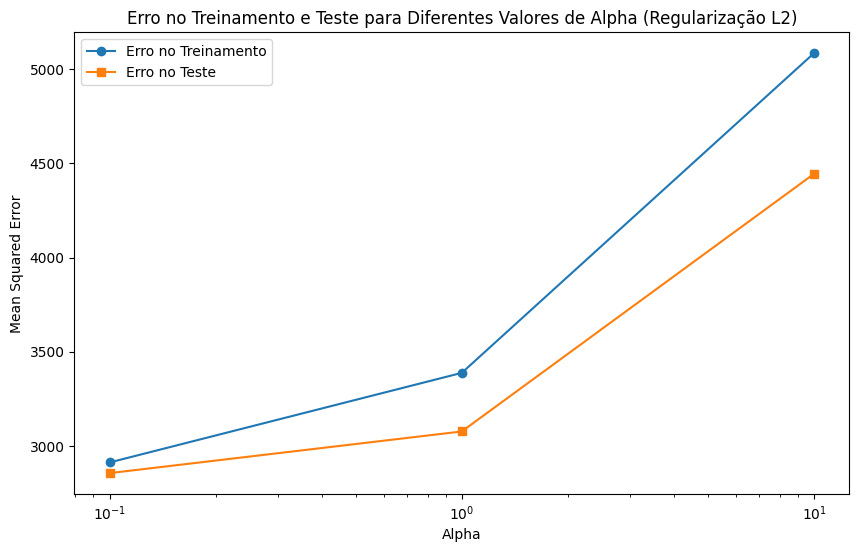

In [45]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar o dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Ridge Regression com regularização L2
alpha_values = [0.1, 1.0, 10.0]
mse_train = []
mse_test = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Plotar MSE para diferentes valores de alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_train, label='Erro no Treinamento', marker='o')
plt.plot(alpha_values, mse_test, label='Erro no Teste', marker='s')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Erro no Treinamento e Teste para Diferentes Valores de Alpha (Regularização L2)')
plt.legend()
plt.show()

### 3. Seleção de Features no Conjunto de Dados Iris

#### Filtragem com `SelectKBest`:

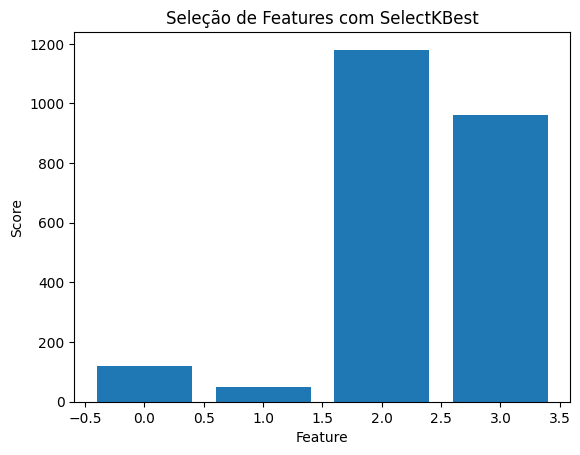

Features selecionadas: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [46]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Selecionar as 2 melhores features
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Exibir as scores das features
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Seleção de Features com SelectKBest')
plt.show()

# Exibir as features selecionadas
print("Features selecionadas:", X_new[:5])

#### Wrapper com `RFE`:

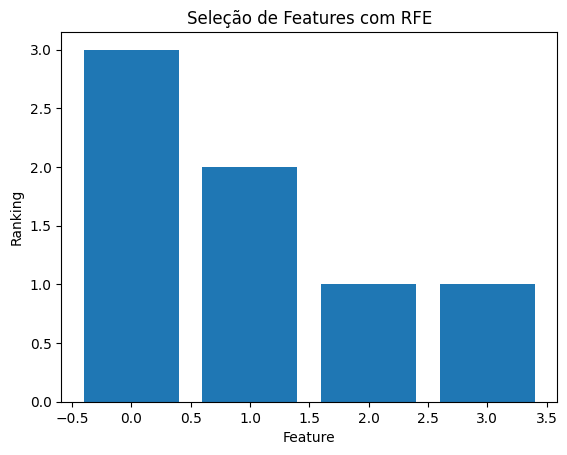

Features selecionadas: [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [47]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar RFE com Logistic Regression para selecionar as 2 melhores features
model = LogisticRegression(max_iter=200)
rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X, y)

# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

# Exibir as features selecionadas
print("Features selecionadas:", X_new[:5])

#### Embedding com `Lasso`:

In [49]:
# import numpy as np
# from sklearn.datasets import load_boston
# from sklearn.linear_model import Lasso
# import matplotlib.pyplot as plt

# # Carregar o dataset Boston
# boston = load_boston()
# X = boston.data
# y = boston.target

# # Aplicar Lasso para seleção de features
# model = Lasso(alpha=0.1)
# model.fit(X, y)

# # Exibir coeficientes das features
# coef = model.coef_
# plt.bar(range(len(coef)), coef)
# plt.xlabel('Feature')
# plt.ylabel('Coeficiente')
# plt.title('Seleção de Features com Lasso')
# plt.show()

# # Exibir as features selecionadas (aquelas com coeficientes diferentes de zero)
# selected_features = np.where(coef != 0)[0]
# print("Features selecionadas:", selected_features)

### Comparação dos Métodos

- **Filtragem**:
  - Vantagens: Simples e rápido.
  - Desvantagens: Não leva em conta a interação entre as features.

- **Wrapper**:
  - Vantagens: Considera a interação entre as features.
  - Desvantagens: Computacionalmente intensivo, especialmente em conjuntos de dados grandes.

- **Embedding**:
  - Vantagens: Seleção de features integrada ao processo de treinamento.
  - Desvantagens: Depende do modelo preditivo escolhido.

### Conclusão

Essas técnicas são fundamentais para pré-processamento de dados em machine learning. A escolha da técnica adequada depende da natureza dos dados e do problema específico.